OVERVIEW

In this application, we are exploring the used car value dataset from Kaggle.The provided dataset contains information on 426K cars to ensure speed of processing. Our goal is to understand what factors make a car more or less expensive. As a result of our analysis, we should be able to provide recommendations to our client -- a used-car dealerships -- as to how to market the used cars.

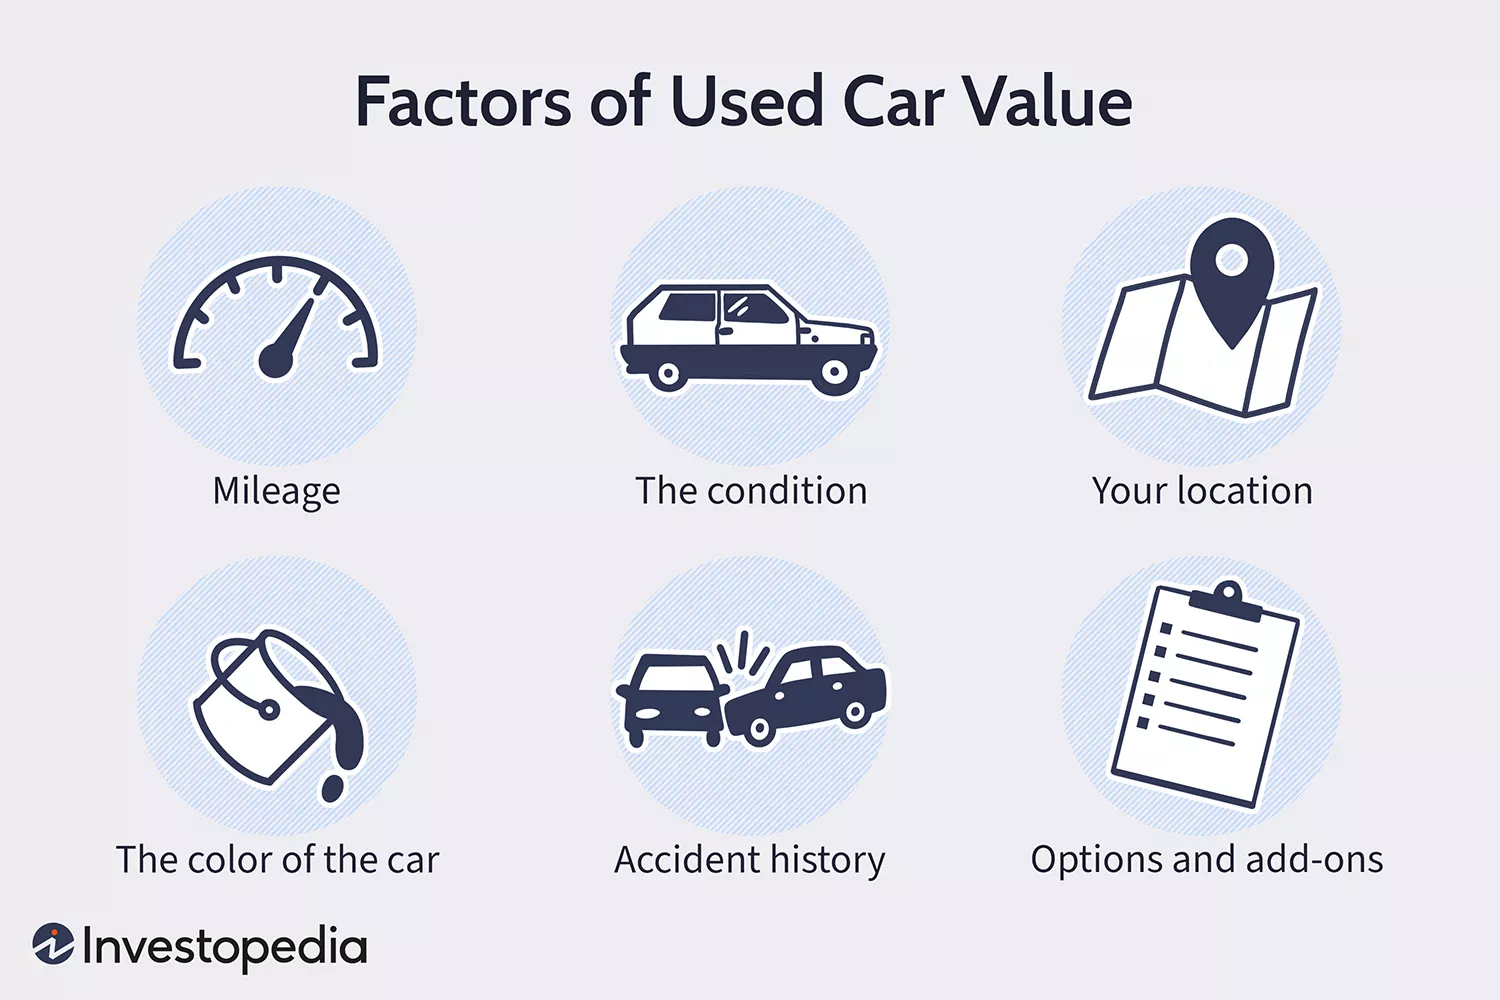 

CRISP-DM Framework

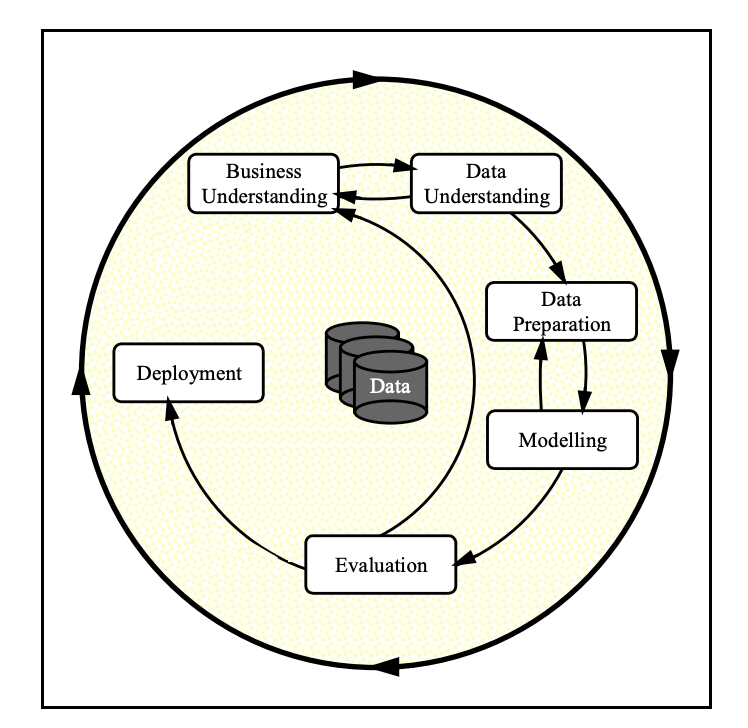                                                                                                                                                        To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM. This process provides a framework for working through a data problem. Our first step in this application is to read through a brief overview of CRISP-DM here(https://www.datascience-pm.com/crisp-dm-2/). After reading the overview, we need to 
answer the questions below.    

1. Business Understanding
   
From a business perspective, we are tasked with identifying key drivers for used car prices. In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition. Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. The primary objective of this analysis is to understand what consumers value most in a used car by identifying the vehicle characteristics that have the largest impact on market price. This information is intended to guide inventory acquisition and pricing decisions for the dealership.

Our task is to build machine learning models that learn to predict used car prices based on their details (like age, mileage, make, condition). We want to use these models to figure out which car details have the biggest impact on the final price of the car and are therefore the most important factor for the car prices. We'll need to clean the car data, teach the models, and see which model out of linear, Lasso or Ridge regression does the best job at predicting the price.


In technical terms, the task is to develop a supervised regression model that predicts the market price of used vehicles based on various vehicle attributes. These features include:

Manufacturer & Model
Year
Odometer
Condition
Fuel Type
Engine Type
Cylinder

The ultimate objective is to enhance pricing precision, derive actionable insights, and support data-informed decision making in the used car market.

2. Data Understanding

Understanding the data set is a critical first step in any data science or machine learning project. This phase involves collecting, describing, and exploring the data to discover key patterns, relationships, and any other data issues.

Key Tasks

Data Description:- Summarize the dataset variable types, missing values, basic statistics (mean, median, etc.).

Data Exploration:- Use visualizations (histograms, scatter plots, correlation matrices) to identify patterns, trends, or anomalies.

Data Quality Checks:- Detect and handle missing, duplicated, or inconsistent entries to ensure reliability.

In [1]:
%%capture
%pip install plotly
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install numpy
%pip install scikit-learn
%pip install vininfo
%pip install vin
%pip install pyvin
%pip install aiohttp
%pip install category_encoders
%pip install mlflow
%pip install xgboost
%pip install catboost
%pip install IPython
%pip install graphviz
%pip install tabulate

In [2]:
# import required python libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import textwrap
import time
import mlflow
import warnings

from vin import VIN
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import set_config
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer
from category_encoders.james_stein import JamesSteinEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import ParameterGrid, train_test_split, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.utils import shuffle
from sklearn.tree import plot_tree
from catboost import CatBoostRegressor
from IPython.display import SVG
from graphviz import Source
from tabulate import tabulate

set_config(display='diagram')
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Explore the used car dataset
CAR_DF=pd.read_csv('data/vehicles.csv')
CAR_DF.info()
CAR_DF.describe()
CAR_DF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
# Find out the NUll values for differnt columns 
CAR_DF.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

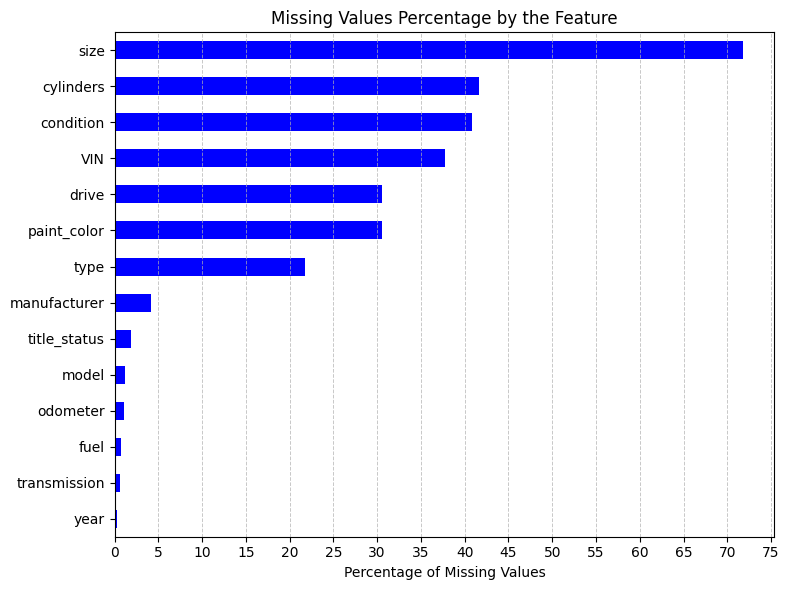

<Figure size 640x480 with 0 Axes>

In [5]:
null_percent = CAR_DF.isnull().mean() * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=True)
max_percent = null_percent.max()
# Plot
plt.figure(figsize=(8, 6))
null_percent.plot(kind='barh', color='blue')
plt.xlabel('Percentage of Missing Values')
plt.title('Missing Values Percentage by the Feature')
plt.xticks(np.arange(0, max_percent + 5, 5))
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
# Show the plot
plt.show()
plt.savefig('images/Missing Values percentage by the feature.png')

**Summary**
1) Dataset size is 426880 X 18.
2) Many columns have missing values.
3) Size column have ~72%+ values missing.

**2. Data Preparation**

After our initial exploration of the dataser, it is time to construct our final dataset prior to modeling. Here, we want to make sure to handle any integrity issues and data cleaning, preparation and any transformations that we believe should happen for modeling with sklearn.

**2.1 Data Wrangling**

In [6]:
# Drop columns
# Drop id, as it is not useful for our analysis
# Drop size column as ~72% of the values are missing.
car_df1 = CAR_DF.drop(['id', 'size'], axis=1)
car_df1.head()
car_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 52.1+ MB


In [7]:
# Drop rows where nan
def drop_nan_rows(car_df1, col):
    total_rows = car_df1.shape[0]
    car_df1 = car_df1[car_df1[col].notna()]
    not_nan_count = len(car_df1)
    print(f'Total rows: {total_rows}')
    print(f'Rows dropped with {col}=NaN : {total_rows - not_nan_count}')
    return car_df1

In [8]:
# Drop rows where year and odometer is nan
car_df1 = drop_nan_rows(car_df1, 'year')
car_df1 = drop_nan_rows(car_df1, 'odometer')
car_df1 = drop_nan_rows(car_df1, 'model')
car_df1 = drop_nan_rows(car_df1, 'manufacturer')
print(f'Final Total Rows: {car_df1.shape[0]}')
car_df1.head()

Total rows: 426880
Rows dropped with year=NaN : 1205
Total rows: 425675
Rows dropped with odometer=NaN : 4331
Total rows: 421344
Rows dropped with model=NaN : 5195
Total rows: 416149
Rows dropped with manufacturer=NaN : 16266
Final Total Rows: 399883


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,truck,black,al


In [9]:
# Remove outliers for price, odometer, year
def remove_outliers(car_df1):
    Q1 = car_df1['price'].quantile(0.25)
    median = car_df1['price'].quantile(0.50)
    Q3 = car_df1['price'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows within bounds
    car_df1['price'] = np.where(car_df1['price'] > upper_bound, median, np.where(car_df1['price'] < lower_bound, median, car_df1['price']))

    # Impute zero value of price with median
    filter_price_zero = (car_df1['price'] == 0) & (car_df1['condition'].notna()) & (car_df1['title_status'].notna())
    car_price_zero_df = car_df1[filter_price_zero]    
    car_df1.loc[car_price_zero_df.index, 'price'] = median

    # Drop rows where price=0 and (condition=nan or title_status=nan)
    drop_price_zero = ((car_df1['price'] == 0) & ((car_df1['condition'].isna()) | (car_df1['title_status'].isna())))
    car_drop_price_zero_df = car_df1[drop_price_zero]   
    total_rows = car_df1.shape[0]
    car_df1 = car_df1.drop(car_drop_price_zero_df.index)
    print(f'Total rows: {total_rows}')
    print(f'Rows dropped with price=0 & (condition=NaN | title=NaN) : {total_rows - car_df1.shape[0]}')

    # Removing outliers by Capping:
    for col in ['odometer', 'year']:
      upper_limit = car_df1[col].quantile(0.99)
      car_df1[col] = np.where(car_df1[col] > upper_limit, upper_limit, car_df1[col])
    return car_df1

car_df1 = remove_outliers(car_df1)
car_df1.head()


Total rows: 399883
Rows dropped with price=0 & (condition=NaN | title=NaN) : 19644


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
27,auburn,33590.0,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,pickup,white,al
28,auburn,22590.0,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,pickup,blue,al
29,auburn,39590.0,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,pickup,red,al
30,auburn,30990.0,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,pickup,red,al
31,auburn,15000.0,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,truck,black,al


In [10]:
# Convert year column values(float to integer)
car_df1['year'] = car_df1['year'].astype('int64')
car_df1.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state
27,auburn,33590.0,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,pickup,white,al
28,auburn,22590.0,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,pickup,blue,al
29,auburn,39590.0,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,pickup,red,al
30,auburn,30990.0,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,pickup,red,al
31,auburn,15000.0,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,truck,black,al


In [11]:
#Reduce distinct values of Car types where possible
unique_types = car_df1['type'].unique()
print(f"Unique values in type are: {unique_types}\n")

Unique values in type are: ['pickup' 'truck' 'other' nan 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'van' 'convertible' 'wagon' 'bus']



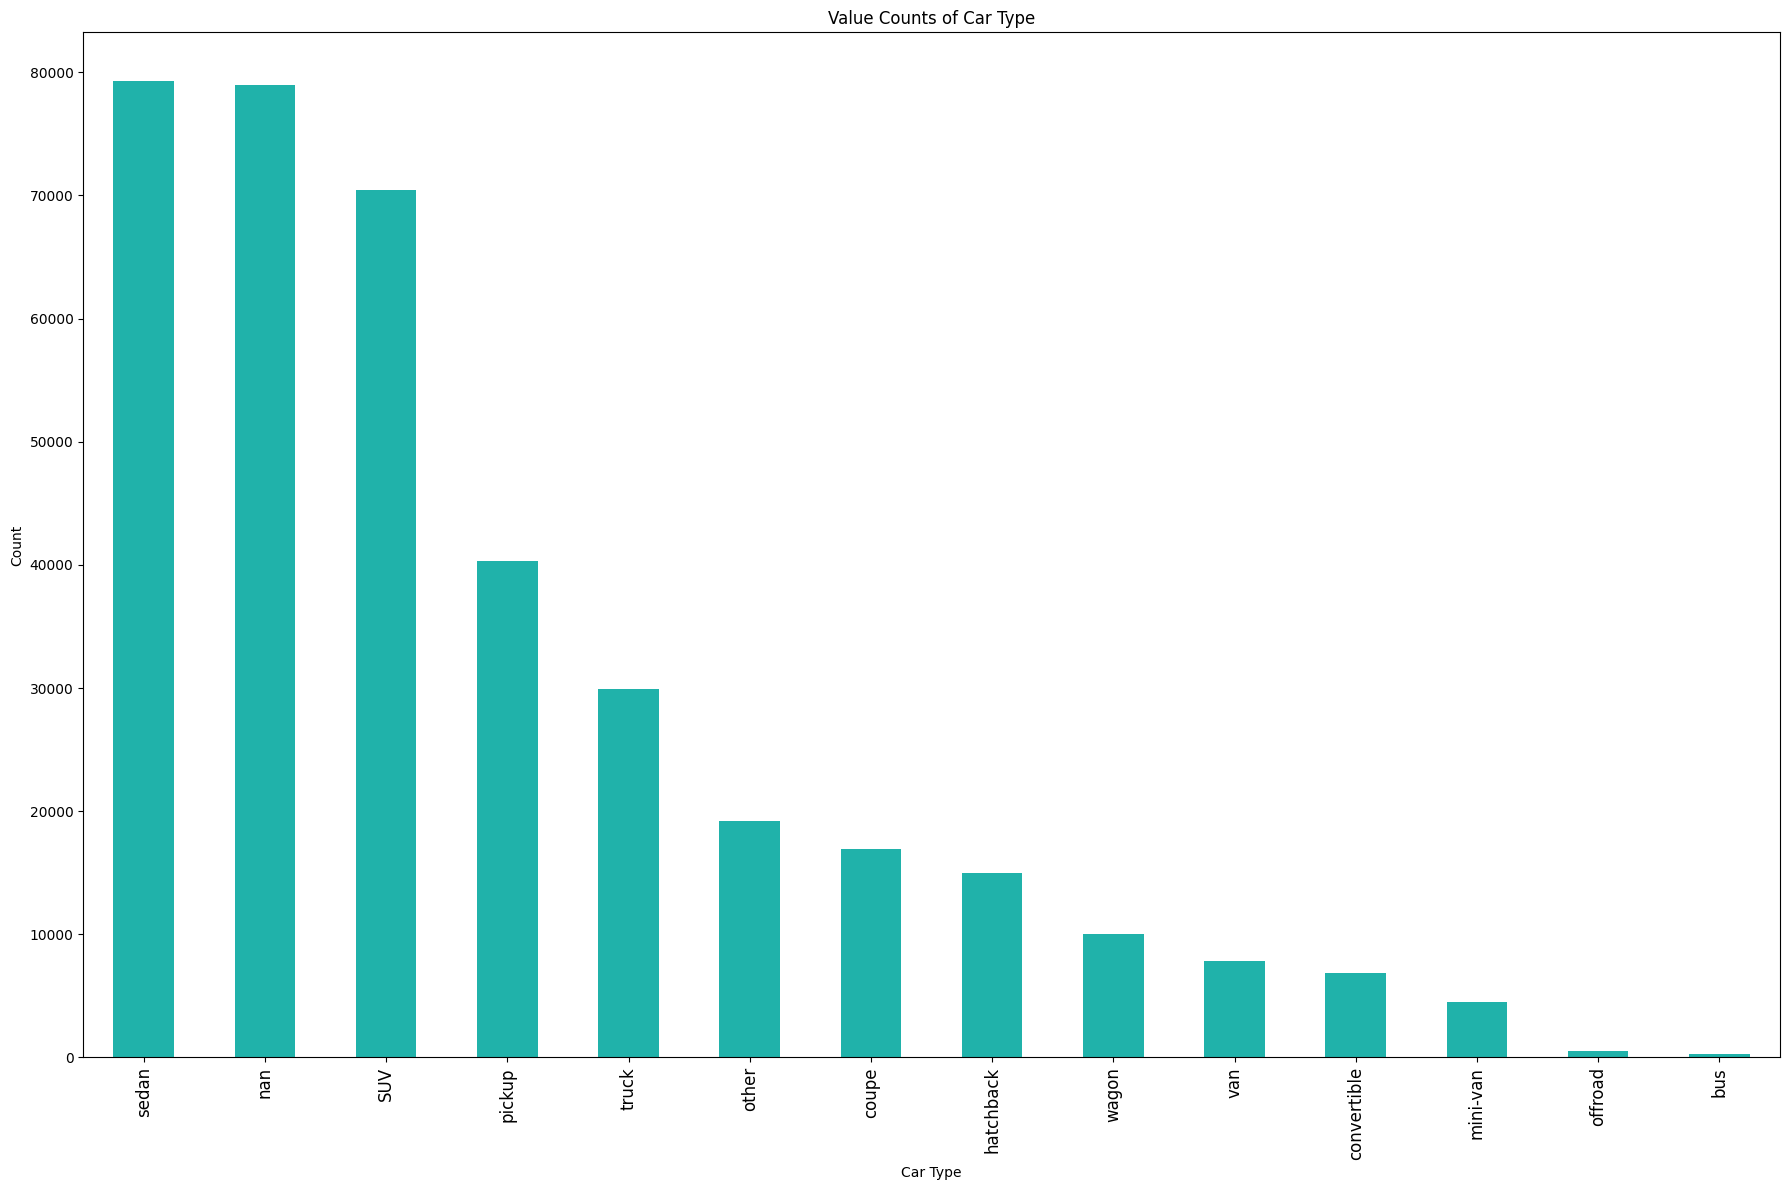

In [12]:
#Value count plot helps to merge certain categories with very low counts 
car_df1['type'].value_counts(dropna=False).plot(kind='bar', figsize=(18, 12), color='lightseagreen')
plt.title('Value Counts of Car Type')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()
plt.savefig("images/Car value count by type.png")  # Saves as PNG
plt.show()

In [13]:
#Reduce distinct values of type column where possible
replace_map = {
    'Convertible/Cabriolet': 'convertible',
    'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)': 'SUV',
    'Sedan/Saloon': 'sedan',
    'Hatchback/Liftback/Notchback': 'hatchback',
    'Cargo Van': 'van',
    'Minivan': 'mini-van',
    'Step Van / Walk-in Van': 'van',
    'offroad': 'other',
    'Sport Utility Truck (SUT)': 'truck',
    'Fire Apparatus': 'other',
    'Incomplete - Chassis Cab (Single Cab)': 'sedan',
    'Crossover Utility Vehicle (CUV)': 'SUV'
    
}
car_df1['type'] = car_df1['type'].replace(replace_map)

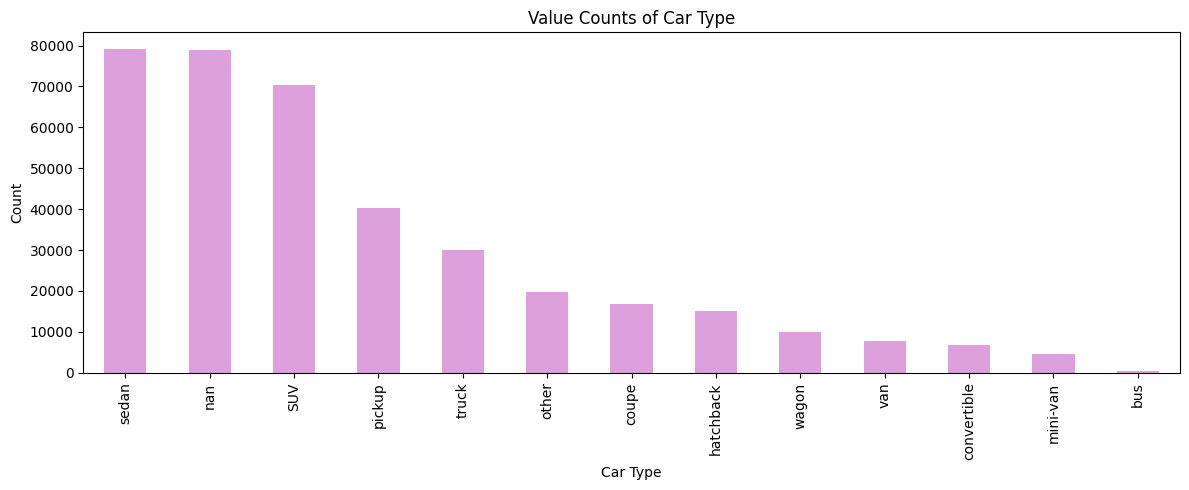

In [14]:
#Final reduced values for type/category of cars
car_df1['type'].value_counts(dropna=False).plot(kind='bar', figsize=(12, 5), color='plum')
plt.title('Value Counts of Car Type')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

In [15]:
# Transform and fix cylinders column
# Change cyclinders to numeric column
car_df1['num_cylinders'] = 0

def transform_cylinders(vehicles_df):
    c8_df = car_df1[car_df1['cylinders'] == '8 cylinders']
    c6_df = car_df1[car_df1['cylinders'] == '6 cylinders']
    c4_df = car_df1[car_df1['cylinders'] == '4 cylinders']
    c5_df = car_df1[car_df1['cylinders'] == '5 cylinders']
    c3_df = car_df1[car_df1['cylinders'] == '3 cylinders']
    c10_df = car_df1[car_df1['cylinders'] == '10 cylinders']
    c12_df = car_df1[car_df1['cylinders'] == '12 cylinders']
    c_other_df = car_df1[car_df1['cylinders'] == 'other']

    car_df1.loc[c8_df.index , 'num_cylinders'] = 8
    car_df1.loc[c6_df.index , 'num_cylinders'] = 6
    car_df1.loc[c4_df.index , 'num_cylinders'] = 4
    car_df1.loc[c5_df.index , 'num_cylinders'] = 5
    car_df1.loc[c3_df.index , 'num_cylinders'] = 3
    car_df1.loc[c10_df.index , 'num_cylinders'] = 10
    car_df1.loc[c12_df.index , 'num_cylinders'] = 12
    car_df1.loc[c_other_df.index , 'num_cylinders'] = np.nan
    return car_df1

car_df1 = transform_cylinders(car_df1)
car_df1.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,state,num_cylinders
27,auburn,33590.0,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,pickup,white,al,8.0
28,auburn,22590.0,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,pickup,blue,al,8.0
29,auburn,39590.0,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,pickup,red,al,8.0
30,auburn,30990.0,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,pickup,red,al,8.0
31,auburn,15000.0,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,truck,black,al,6.0


In [25]:
car_df1['num_cylinders'].unique()

array([ 8.,  6.,  0.,  4.,  5., 10.,  3., nan, 12.])

In [26]:
# Set number of cyclinders for electric cars to zero
def fix_cylinders_for_electric_vehicle(car_df1):
    v_fuel_electric = car_df1[(car_df1['fuel'] == 'electric')]
    car_df1.loc[v_fuel_electric.index , 'num_cylinders'] = 0
    return car_df1

car_df1 = fix_cylinders_for_electric_vehicle(car_df1)
car_df1[(car_df1['fuel'] == 'electric')]['num_cylinders'].unique()


array([0.])

In [27]:
#Perform ordinal encoding for title_status, condition, drive and vehicle type of vehicles
def ordinal_encode(car_df1, col, categories): 
    # Create encoder
    encoder = OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1)
    
    # Fit and transform
    car_df1[f'vehicle_{col}'] = encoder.fit_transform(car_df1[[col]])
    return car_df1

#Define custom order
title_categories = [['parts only', 'missing', 'salvage', 'rebuilt', 'lien', 'clean']]  # ordered worst to best
car_df1 = ordinal_encode(car_df1, 'title_status', title_categories)

condition_categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']] # ordered worst to best
car_df1 = ordinal_encode(car_df1, 'condition', condition_categories)

drive_categories = [['fwd', 'rwd', '4wd']] # ordered worst to best
car_df1 = ordinal_encode(car_df1, 'drive', drive_categories)

type_categories = [['other', 'mini-van', 'hatchback', 'sedan', 'coupe', 'wagon', 'SUV', 'van', 'pickup', 'offroad', 'truck', 'convertible', 'bus']]
car_df1 = ordinal_encode(car_df1, 'type', type_categories)

In [28]:
# Find interaction between features
def find_feature_interaction(car_df1):
    car_df1 = car_df1.reset_index(drop=True)
    car_df1['vehicle_age'] = (2025 - car_df1['year']).astype('float64')
    car_df1['log_vehicle_age'] = np.log1p(car_df1['vehicle_age'])
    car_df1['vehicle_age_odometer_ratio'] = car_df1['odometer'] / car_df1['vehicle_age'].replace(0, 1)
    car_df1['vehicle_age_condition'] = car_df1['vehicle_age'] * car_df1['vehicle_condition']
    return car_df1

car_df1 = find_feature_interaction(car_df1)
car_df1.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,state,num_cylinders,vehicle_title_status,vehicle_condition,vehicle_drive,vehicle_type,vehicle_age,log_vehicle_age,vehicle_age_odometer_ratio,vehicle_age_condition
0,auburn,33590.0,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,...,al,8.0,5.0,2.0,-1.0,8.0,11.0,2.484907,5265.727273,22.0
1,auburn,22590.0,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,...,al,8.0,5.0,2.0,-1.0,8.0,15.0,2.772589,4748.600000,30.0
2,auburn,39590.0,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,...,al,8.0,5.0,2.0,-1.0,8.0,5.0,1.791759,3832.000000,10.0
3,auburn,30990.0,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,...,al,8.0,5.0,2.0,-1.0,8.0,8.0,2.197225,5140.500000,16.0
4,auburn,15000.0,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,...,al,6.0,5.0,3.0,1.0,10.0,12.0,2.564949,10666.666667,36.0


**Summary of Data Wrangling**

* Drop id column, as it is not useful for our analysis.
* Drop size column as ~72% of the values are missing.
* Apply VIN based imputation for year, make, model and vehicle type columns using python library (vin)
* Droped rows with NaN values.
   + Year Column: 1205 rows
   + Odometer Column: 4331 rows
   + Model Column: 5195 rows
   + Manufacturer Column: 16266 rows
* Observed outliers in price column.
  + We used IQR to remove outliers from price column.
  + Impute zero value of price with median when condition != NaN and title_status != Nan
  + Drop rows where price=0 and (condition=nan or title_status=nan)
* Removed outliers above 99 percentile for price and odometer columns.
* Convert year column data type from float to integer.
* Transform cylinders by adding a new numeric column(num_cylinders).
  + Initialize num_cylinders colums with 0.
  + Assigned corropspnding numeric value of cylinders to num_cylinders column.
  + Set NaN for cylinders type of 'Other'. Used make, model and vehicle type to impute cylinders with NaN value.
  + Set num_cylinders for elctric vehicles to 0
* Performed ordinal encoding for below columns
  + title_status
  + condition
  + type
  + drive
* Added new columns based on features interaction
  + vehicle_age: Absolute age of the vehicle in years.
  + log_vehicle_age: Vehicle does not decline linearly. So, log of age represents depreciation more accurately.
  + vehicle_age_odometer_ratio: (Vehicle wear rate) Ratio of odometer and vehicle age ratio
  + vehicle_age_condition: Helps identify if older cars are in surprisingly good/bad condition.

**2.2 Data Visualization**
  

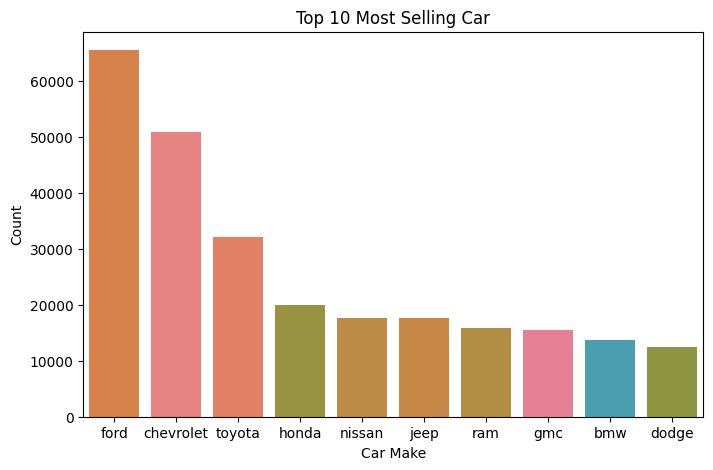

<Figure size 640x480 with 0 Axes>

In [29]:
# Top Selling cars
top10 = car_df1['manufacturer'].value_counts()[:10]

# Create a count plot to visualize the top 10 car
plt.figure(figsize=(8, 5))
sns.countplot(x='manufacturer', data=car_df1, order=top10.index, hue='manufacturer')

# Set labels and title for the plot
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

# Display the plot
plt.show()
plt.savefig('images/top10_selling_car.png')

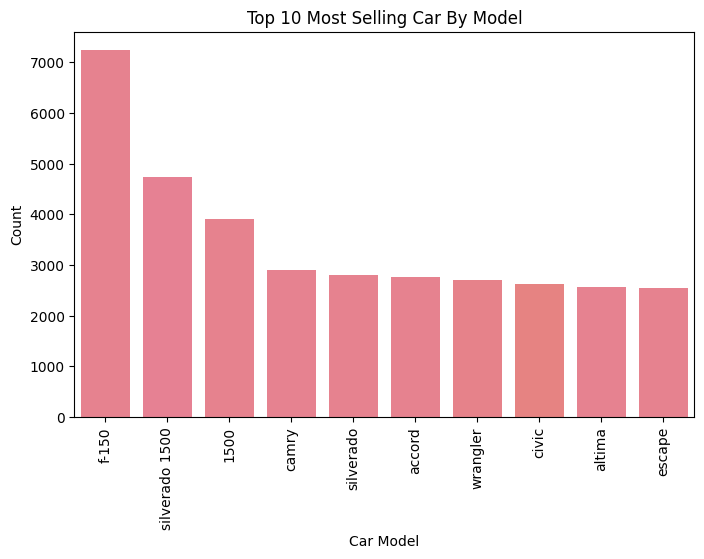

In [23]:
# Top 10 selling cars by model
top10model = car_df1['model'].value_counts()[:10]

# Create a count plot to visualize the top 10 car
plt.figure(figsize=(8, 5))
sns.countplot(x='model', data=car_df1, order=top10model.index, hue='model')

# Set labels and title for the plot
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 10 Most Selling Car By Model')

# Display the plot
plt.show()

**2.3 Data Cleaning/Transformation**


In [30]:
# Make a copy of dataset as a checkpoint
c_df = car_df1.copy()
c_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,state,num_cylinders,vehicle_title_status,vehicle_condition,vehicle_drive,vehicle_type,vehicle_age,log_vehicle_age,vehicle_age_odometer_ratio,vehicle_age_condition
0,auburn,33590.0,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,...,al,8.0,5.0,2.0,-1.0,8.0,11.0,2.484907,5265.727273,22.0
1,auburn,22590.0,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,...,al,8.0,5.0,2.0,-1.0,8.0,15.0,2.772589,4748.600000,30.0
2,auburn,39590.0,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,...,al,8.0,5.0,2.0,-1.0,8.0,5.0,1.791759,3832.000000,10.0
3,auburn,30990.0,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,...,al,8.0,5.0,2.0,-1.0,8.0,8.0,2.197225,5140.500000,16.0
4,auburn,15000.0,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,...,al,6.0,5.0,3.0,1.0,10.0,12.0,2.564949,10666.666667,36.0


In [31]:
# Get electric vehicles
c_electric = c_df[c_df['fuel'] == 'electric']
c_electric['cylinders'].unique()

array([nan, '4 cylinders', 'other', '8 cylinders', '6 cylinders',
       '3 cylinders'], dtype=object)

In [32]:
# Encode category columns based on JamesSteinEncoder
def encode_cat_features(c, feature, target):
    X = c[feature]
    y = c[target]
    
    encoder = JamesSteinEncoder(cols=feature)
    # Fit
    encoder.fit(X, y)
    
    # Transform
    c[f'{feature}_encoded'] = encoder.transform(X)
    c[f'{feature}_encoded'].unique()
    
    return c

In [33]:
# Apply encoding for reamining category columns
c_df = encode_cat_features(c_df, 'region', 'price')
c_df = encode_cat_features(c_df, 'manufacturer', 'price')
c_df = encode_cat_features(c_df, 'paint_color', 'price')
c_df = encode_cat_features(c_df, 'state', 'price')

In [34]:
# Apply LabelEncoder for model
def apply_label_encoding_for_model(c, col):
    le = LabelEncoder()
    # Fit and transform
    c[f'{col}_encoded'] = le.fit_transform(c_df[col])
    return c_df

c_df = apply_label_encoding_for_model(c_df, 'model')

In [35]:
# Apply IterativeImputer and RandomForestRegressor for cylinders
def apply_iterative_imputer_cylinders(col):
    imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=42),
                           max_iter=10,
                           random_state=42)
    c_df[col] = imputer.fit_transform(c_df[['manufacturer_encoded','model_encoded', 'vehicle_type', 'num_cylinders']])
    return c_df

c_df = apply_iterative_imputer_cylinders('num_cylinders')

In [36]:
# Check percentage of missing values for the columns which have more non-zero missing values
def find_missing_values_percentage(v):
    missing_values_all = v.isna().sum()
    missing_values = missing_values_all[missing_values_all > 0]
    missing_values_percentage = (missing_values / v.shape[0]) * 100
    return missing_values_percentage

missing_values_percent = find_missing_values_percentage(c_df)
missing_values_percent

condition       37.460387
cylinders       40.270987
fuel             0.516517
title_status     1.851204
transmission     0.386073
VIN             37.228427
drive           29.924600
type            20.775354
paint_color     29.091177
dtype: float64

In [37]:
# Drop unused columns after the transformation
def drop_not_useful_columns(c_df):
    cols = ['year', 'region', 'manufacturer', 'model', 'condition',
           'cylinders', 'fuel', 'title_status', 'transmission', 'VIN',
           'drive', 'type', 'paint_color', 'state']
    
    c_df_clean = c_df.drop(cols, axis=1)
    return c_df_clean

c_df_clean = drop_not_useful_columns(c_df)

# Make sure, we don't have any nan in the data
missing_values_percent = find_missing_values_percentage(c_df_clean)
missing_values_percent

Series([], dtype: float64)

In [38]:
c_df_clean.head()

,price,odometer,num_cylinders,vehicle_title_status,vehicle_condition,vehicle_drive,vehicle_type,vehicle_age,log_vehicle_age,vehicle_age_odometer_ratio,vehicle_age_condition,region_encoded,manufacturer_encoded,paint_color_encoded,state_encoded,model_encoded
0,33590.0,57923.0,19775.108518,5.0,2.0,-1.0,8.0,11.0,2.484907,5265.727273,22.0,24283.545286,19775.108518,19421.135308,19017.324546,18035
1,22590.0,71229.0,17997.342304,5.0,2.0,-1.0,8.0,15.0,2.772589,4748.600000,30.0,24283.545286,17997.342304,16915.537949,19017.324546,18413
2,39590.0,19160.0,17997.342304,5.0,2.0,-1.0,8.0,5.0,1.791759,3832.000000,10.0,24283.545286,17997.342304,18025.345278,19017.324546,18458
3,30990.0,41124.0,17175.624575,5.0,2.0,-1.0,8.0,8.0,2.197225,5140.500000,16.0,24283.545286,17175.624575,18025.345278,19017.324546,21293
4,15000.0,128000.0,18358.433882,5.0,3.0,1.0,10.0,12.0,2.564949,10666.666667,36.0,24283.545286,18358.433882,19145.986027,19017.324546,9163


**2.4 Correlation Heatmap of Car dataset**
To gain insights into relationships among variables in the dataset, we generated a correlation heatmap. This visual representation highlights how strongly each feature correlates with others, particularly the target variable price.

  * **Dark blue/red cells** indicate strong correlations (positive or negative).
  * **Lighter shades** indicate weaker relationships.
We used absolute values to sort and annotate the top correlations, both positively and negatively associated with price.



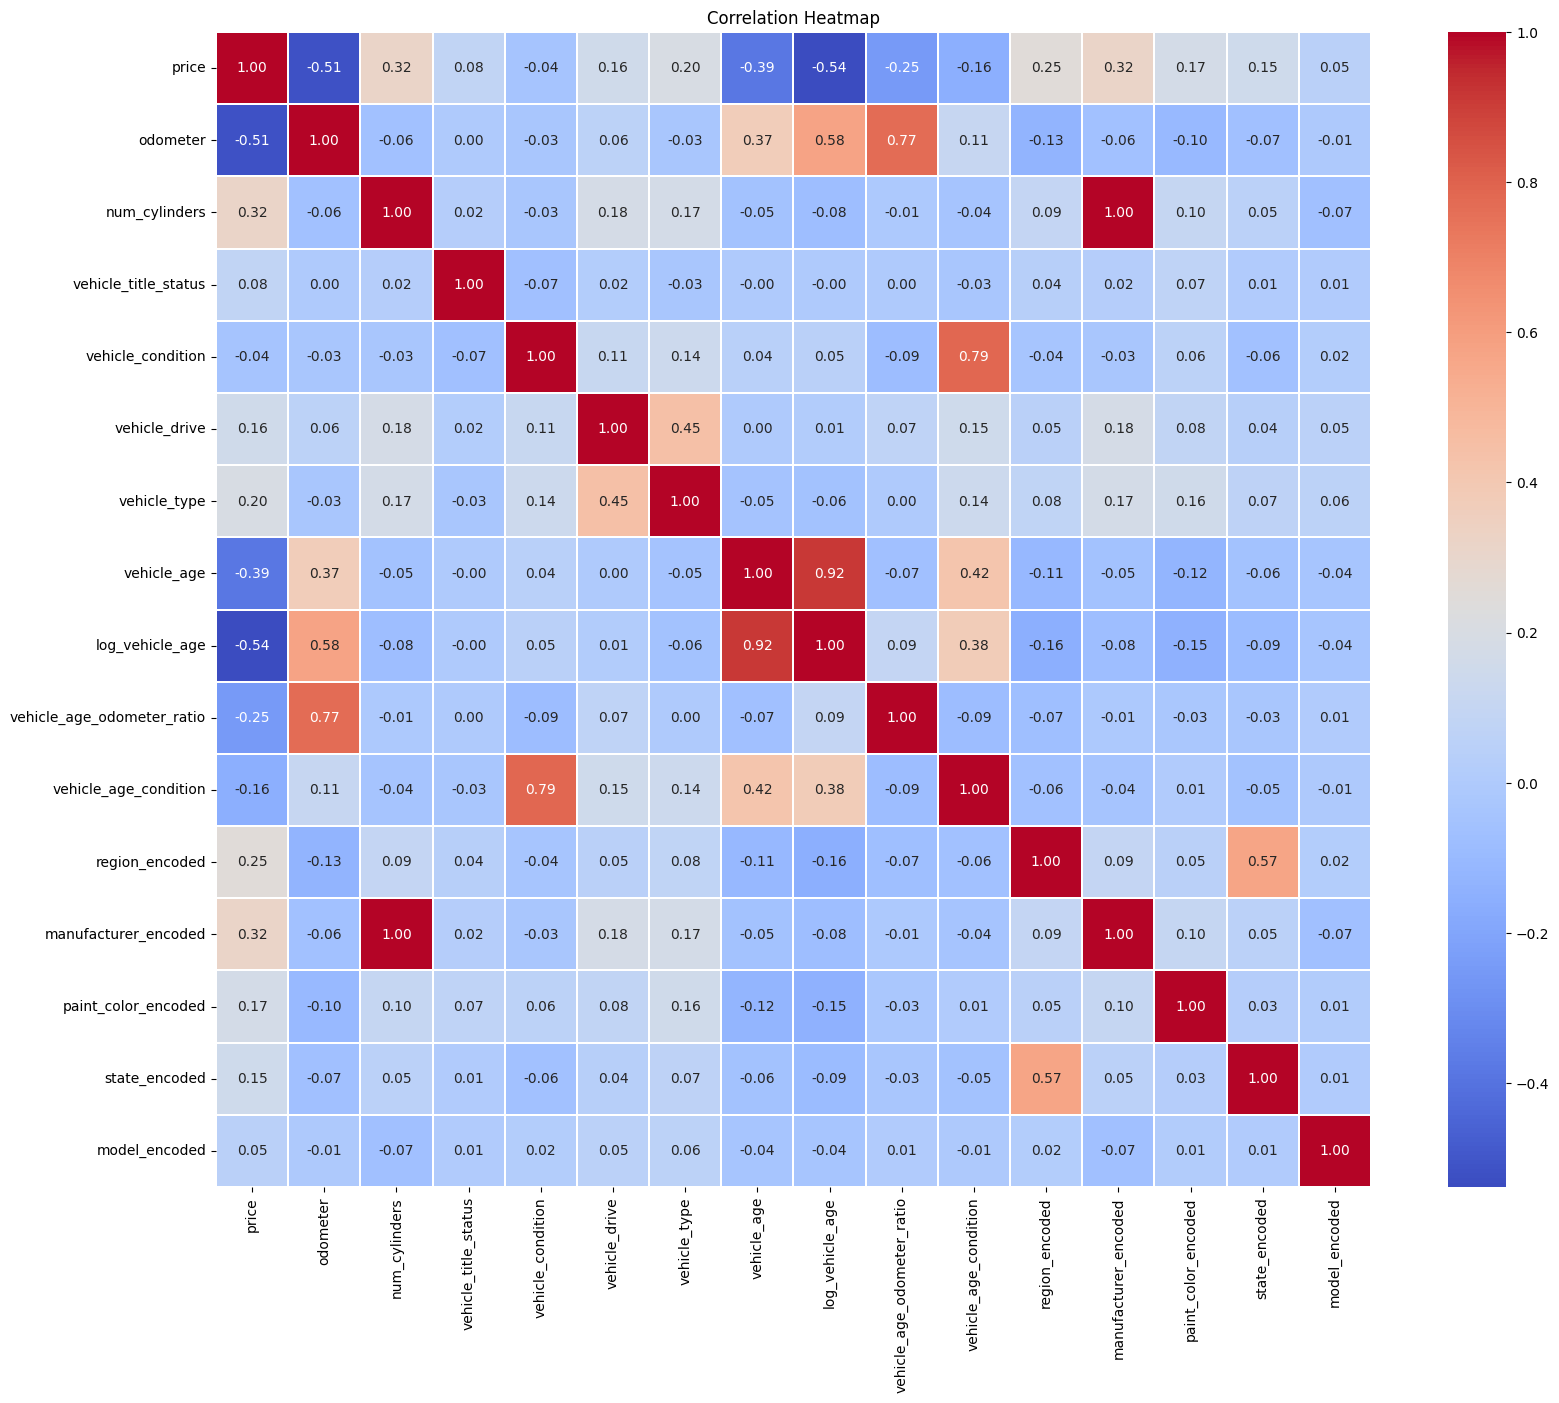

<Figure size 640x480 with 0 Axes>

In [39]:
# Correlation Heatmap visualization code
# Set the size of the plot
plt.figure(figsize=(20, 15))

# Create a heatmap of the correlation matrix with annotations
corr_matrix = c_df_clean.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot

plt.show()
plt.savefig('images/Correlation Heatmap.png')

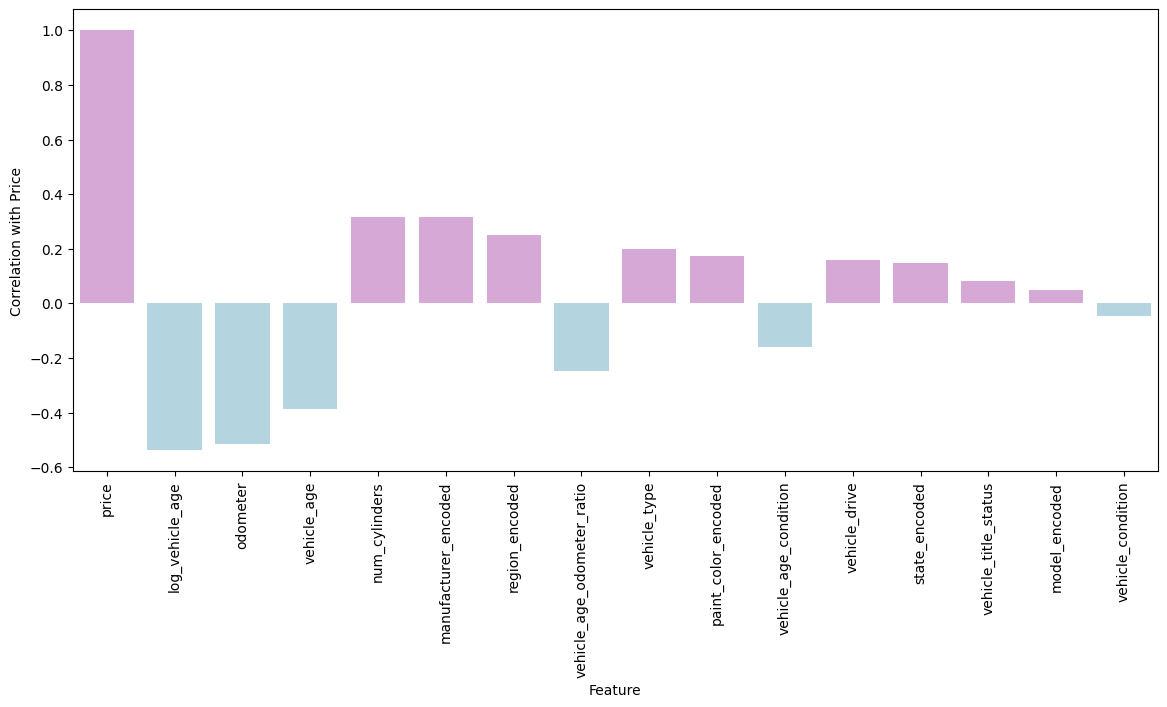

In [43]:
# Get raw correlation (not absolute) for top 20 correlated features
price_corr_signed = corr_matrix['price'].sort_values(key=lambda x: x.abs(), ascending=False).head(20)

# Create DataFrame
price_corr_df_signed = pd.DataFrame({
    'Feature': price_corr_signed.index,
    'Correlation with Price': price_corr_signed.values
}).reset_index(drop=True)

# Assign colors based on sign
colors = ['plum' if val > 0 else 'lightblue' for val in price_corr_df_signed['Correlation with Price']]

# Plot as vertical bar chart
plt.figure(figsize=(14, 6))
plt.xticks(rotation=90)
sns.barplot(
    data=price_corr_df_signed,
    x='Feature',
    y='Correlation with Price',
    palette=colors,
    
)
plt.savefig('images/top 20 correlated features.png')

**3. Modeling**

In this section, we develop and evaluate machine learning models to predict the price of used cars based on various features. We use techniques such as polynomial regression, pipeline workflows, feature scaling, and cross-validation to build robust and interpretable models.

In [44]:
c_df_clean = shuffle(c_df_clean)
c_split_count = int(c_df_clean.shape[0] * 0.9)
data, data_valid = np.split(c_df_clean, [c_split_count], axis=0)
print(data.shape)
print(data_valid.shape)
X = data.drop('price', axis=1)
y = data['price']

(342215, 16)
(38024, 16)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,odometer,num_cylinders,vehicle_title_status,vehicle_condition,vehicle_drive,vehicle_type,vehicle_age,log_vehicle_age,vehicle_age_odometer_ratio,vehicle_age_condition,region_encoded,manufacturer_encoded,paint_color_encoded,state_encoded,model_encoded
17935,35800.0,19025.149849,5.0,4.0,1.0,3.0,8.0,2.197225,4475.000000,32.0,19508.316814,19025.149849,16793.485787,18754.334676,11946
31996,32949.0,14586.363401,5.0,3.0,2.0,6.0,6.0,1.945910,5491.500000,18.0,16277.959347,14586.363401,16915.537949,17308.730443,3438
91831,134000.0,17175.624575,5.0,3.0,0.0,7.0,17.0,2.890372,7882.352941,51.0,16458.542864,17175.624575,18025.345278,17328.793046,17899
306854,72987.0,19195.139344,5.0,2.0,-1.0,3.0,11.0,2.484907,6635.181818,22.0,19896.400907,19195.139344,19421.135308,19118.446630,21131
100322,145300.0,13863.868976,5.0,1.0,-1.0,3.0,20.0,3.044522,7265.000000,20.0,14877.031157,13863.868976,16793.485787,17328.793046,3322


In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342215 entries, 232734 to 118591
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   odometer                    342215 non-null  float64
 1   num_cylinders               342215 non-null  float64
 2   vehicle_title_status        342215 non-null  float64
 3   vehicle_condition           342215 non-null  float64
 4   vehicle_drive               342215 non-null  float64
 5   vehicle_type                342215 non-null  float64
 6   vehicle_age                 342215 non-null  float64
 7   log_vehicle_age             342215 non-null  float64
 8   vehicle_age_odometer_ratio  342215 non-null  float64
 9   vehicle_age_condition       342215 non-null  float64
 10  region_encoded              342215 non-null  float64
 11  manufacturer_encoded        342215 non-null  float64
 12  paint_color_encoded         342215 non-null  float64
 13  state_encoded 

In [48]:
# Find best model compexity
num_features = ['odometer', 'num_cylinders', 'state_encoded', 'region_encoded',
       'vehicle_condition', 'vehicle_drive', 'vehicle_type', 'manufacturer_encoded', 'paint_color_encoded',
       'log_vehicle_age', 'vehicle_age_odometer_ratio', 'vehicle_age_condition', 'vehicle_age', 'model_encoded']

def find_best_model_complexity(regressor, param_grid):
    scalable_regressor = ['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet']
    preprocessor = None
    
    print(f'Training {regressor.__class__.__name__} model')
    
    if regressor.__class__.__name__ in scalable_regressor:
        preprocessor = ColumnTransformer(
            transformers=[
                ('transformer', Pipeline([ 
                    ('scaler', StandardScaler()),
                    ('poly', PolynomialFeatures(interaction_only=True, include_bias=False))
                ]), num_features),
            ])
    else:
        preprocessor = ColumnTransformer(
        transformers=[
            ('transformer', Pipeline([ 
                ('poly', PolynomialFeatures(interaction_only=True, include_bias=False))
            ]), num_features),
        ])

    pipeline = Pipeline([
      ('preprocessor', preprocessor),
      ('regressor', regressor)
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid = param_grid,
        scoring = "r2",
        cv=5,
        n_jobs=-1,
        verbose=1,
        refit=True,
        return_train_score=True)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    cv_results = grid.cv_results_

    print("#" * 60)
    print(f'Best Hyperparameters: {grid.best_params_}')
    
    return best_model, cv_results, grid

**3.1 Linear Regression**

In [49]:
# Linear Regression
start_time = time.time()
lr_param_grid = {
    'preprocessor__transformer__poly__degree': [1, 2]
}
best_model_lr, cv_results_lr, grid_lr = find_best_model_complexity(LinearRegression(), lr_param_grid)
end_time = time.time()
print("🕒 Duration (seconds):", end_time - start_time)

Training LinearRegression model
Fitting 5 folds for each of 2 candidates, totalling 10 fits
############################################################
Best Hyperparameters: {'preprocessor__transformer__poly__degree': 2}
🕒 Duration (seconds): 3.969844102859497


**3.2 Ridge Regression**

In [50]:
# Ridge Regression
start_time = time.time()
rr_param_grid = {
    'preprocessor__transformer__poly__degree': [1],
    'regressor__random_state': [42],
    'regressor__fit_intercept': [True, False],
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'regressor__solver': ['auto', 'saga'],
    'regressor__tol': [1e-4, 1e-3, 1e-2]
}
best_model_rr, cv_results_rr, grid_rr = find_best_model_complexity(Ridge(), rr_param_grid)
end_time = time.time()
print("🕒 Duration (seconds):", end_time - start_time)

Training Ridge model
Fitting 5 folds for each of 72 candidates, totalling 360 fits
############################################################
Best Hyperparameters: {'preprocessor__transformer__poly__degree': 1, 'regressor__alpha': 0.001, 'regressor__fit_intercept': True, 'regressor__random_state': 42, 'regressor__solver': 'saga', 'regressor__tol': 0.001}
🕒 Duration (seconds): 12.151981115341187


**3.3 Lasso Regression**

In [51]:
# Lasso Regression
start_time = time.time()
lr_param_grid = {
    'preprocessor__transformer__poly__degree': [1], 
    'regressor__random_state': [42],
    'regressor__alpha': np.logspace(-4, 1, 10),
    'regressor__fit_intercept': [True],
    'regressor__warm_start': [True],
    'regressor__precompute': [True],
    'regressor__max_iter': [50000],
    'regressor__tol': [1e-2, 1e-3, 1e-4]
}
best_model_ls, cv_results_ls, grid_ls = find_best_model_complexity(Lasso(), lr_param_grid)
end_time = time.time()
print("🕒 Duration (seconds):", end_time - start_time)

Training Lasso model
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80108750509.00195, tolerance: 33775756705.6849
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82840161097.80664, tolerance: 33908381044.680565
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83246478518.96094, tolerance: 33890043202.15039
  model = cd_fast.enet_coordina

############################################################
Best Hyperparameters: {'preprocessor__transformer__poly__degree': 1, 'regressor__alpha': np.float64(0.05994842503189409), 'regressor__fit_intercept': True, 'regressor__max_iter': 50000, 'regressor__precompute': True, 'regressor__random_state': 42, 'regressor__tol': 0.001, 'regressor__warm_start': True}
🕒 Duration (seconds): 2.508389711380005


**3.4 ElasticNet Regression**

In [52]:
## ElasticNet Regression
start_time = time.time()
er_param_grid = {
    'preprocessor__transformer__poly__degree': [1], 
    'regressor__random_state': [42],
    'regressor__selection': ['cyclic', 'random'],
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10],
    'regressor__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'regressor__fit_intercept': [True, False],
    'regressor__warm_start': [True],
    'regressor__precompute': [True],
    'regressor__max_iter': [100000],
    'regressor__tol': [1e-4, 1e-3]
}
best_model_er, cv_results_er, grid_er = find_best_model_complexity(ElasticNet(), er_param_grid)
end_time = time.time()
print("🕒 Duration (seconds):", end_time - start_time)

Training ElasticNet model
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
############################################################
Best Hyperparameters: {'preprocessor__transformer__poly__degree': 1, 'regressor__alpha': 0.001, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.9, 'regressor__max_iter': 100000, 'regressor__precompute': True, 'regressor__random_state': 42, 'regressor__selection': 'random', 'regressor__tol': 0.001, 'regressor__warm_start': True}
🕒 Duration (seconds): 15.100189924240112


**3.5 DecisionTreeRegressor**

In [53]:
start_time = time.time()
dt_param_grid = {
    'preprocessor__transformer__poly__degree': [1], 
    'regressor__min_samples_split': [2, 10, 20],
    'regressor__min_samples_leaf': [1, 5, 10],
    'regressor__max_depth': [5, 10, 20, None],
    'regressor__max_features': ['sqrt', 'log2', None],
    'regressor__ccp_alpha': [0.0, 0.01, 0.1],
    'regressor__random_state': [42]
}
best_model_dt, cv_results_dt, grid_dt = find_best_model_complexity(DecisionTreeRegressor(), dt_param_grid)
end_time = time.time()
print("🕒 Duration (seconds):", end_time - start_time)

Training DecisionTreeRegressor model
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
############################################################
Best Hyperparameters: {'preprocessor__transformer__poly__degree': 1, 'regressor__ccp_alpha': 0.01, 'regressor__max_depth': None, 'regressor__max_features': None, 'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 20, 'regressor__random_state': 42}
🕒 Duration (seconds): 103.38047695159912


**3.6 RandomForestRegressor**


In [54]:
start_time = time.time()
best_model_rf, cv_results_rf, grid_rf = None, None, None
try: 
    rf_param_grid = {
        'preprocessor__transformer__poly__degree': [1], 
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [8, 16, 32],
        'regressor__n_estimators': [500],
        'regressor__warm_start': [True],
        'regressor__max_features': ['sqrt'],
        'regressor__random_state': [42],
        'regressor__max_depth': [10, 20, 40],
        'regressor__bootstrap': [True]
    }
    best_model_rf, cv_results_rf, grid_rf = find_best_model_complexity(RandomForestRegressor(), rf_param_grid)
except Exception as e:
    print("⚠️ Error:", str(e))
    
end_time = time.time()
print("🕒 Duration (seconds):", end_time - start_time)

Training RandomForestRegressor model
Fitting 5 folds for each of 27 candidates, totalling 135 fits
############################################################
Best Hyperparameters: {'preprocessor__transformer__poly__degree': 1, 'regressor__bootstrap': True, 'regressor__max_depth': 40, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 8, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 500, 'regressor__random_state': 42, 'regressor__warm_start': True}
🕒 Duration (seconds): 1518.1674890518188


**4. Evaluation**

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this. We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.

In [61]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE Train', 'MSE Test', 'RMSE Train', 'RMSE Test', 
                              'MAE Train', 'MAE Test', 'R2 Train', 'R2 Test', 'Adjusted R2 Train', 'Adjusted R2 Test'])

Adjusted R² is a modified version of the R² (coefficient of determination) that accounts for the number of independent variables (features) in your model. It penalizes the addition of irrelevant features, unlike R² which always increases (or stays the same) when new features are added—even if they don’t improve the model.

In [62]:
# Adjusted R2 score
def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    return 1 - ((1 - r2) * (n - 1)) / (n - n_features - 1)

In [63]:
# Function for model evaluation
mse_train_models = []
mse_test_models = []
rmse_train_models = []
rmse_test_models = []
mae_train_models = []
mae_test_models = []
r2_train_models = []
r2_test_models = []
adjusted_r2_train_models = []
adjusted_r2_test_models = []

def evaluate_models(best_model, model_name, y_test, X_test, y_train, X_train):

    '''
      Print evaluation metrics based on y_test and y_pred
      Plot actual vs predicted values
      Plot important features
      Returns a list of the model scores
    '''
    
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Calculating Evaluation Metrics
    mse_train = np.round(mean_squared_error(y_train_pred, y_train), 2)
    mse_test = np.round(mean_squared_error(y_test_pred, y_test), 2)
    rmse_train = np.round(np.sqrt(mse_train), 2)
    rmse_test = np.round(np.sqrt(mse_test), 2)
    mae_train = np.round(mean_absolute_error(y_train, y_train_pred), 2)
    mae_test = np.round(mean_absolute_error(y_test, y_test_pred), 2)
    r2_train = np.round(r2_score(y_train, y_train_pred), 2)
    r2_test = np.round(r2_score(y_test, y_test_pred), 2)
    adjusted_r2_train = np.round(adjusted_r2_score(y_train, y_train_pred, X_train.shape[1]), 2)
    adjusted_r2_test = np.round(adjusted_r2_score(y_test, y_test_pred, X_test.shape[1]), 2)

    mse_train_models.append(mse_train)
    mse_test_models.append(mse_test)
    rmse_train_models.append(rmse_train)
    rmse_test_models.append(rmse_test)
    mae_train_models.append(mae_train)
    mae_test_models.append(mae_test)
    r2_train_models.append(r2_train)
    r2_test_models.append(r2_test)
    adjusted_r2_train_models.append(adjusted_r2_train)
    adjusted_r2_test_models.append(adjusted_r2_test)

    # Printing Evaluation Matrix
    print("MSE Train:" , mse_train)
    print("MSE Test:" , mse_test)
    print("RMSE Train:" ,rmse_train)
    print("RMSE Test:" ,rmse_test)
    print("MAE Train:" ,mae_train)
    print("MAE Test:" ,mae_test)
    print("R2 Train:", r2_train)
    print("R2 Test:", r2_test)
    print("Adjusted R2 Train:", adjusted_r2_train)
    print("Adjusted R2 Test:", adjusted_r2_test)

    # plot actual and predicted values
    plt.figure(figsize=(12,4))
    plt.plot(np.array(y_test_pred)[:100], linestyle='-', marker='^')
    plt.plot(np.float64((y_test)[:100]))
    plt.legend(["Predicted", "Actual"])
    plt.title('Actual and Predicted Selling Price', fontsize=12)
    
    results = permutation_importance(best_model, X_test, y_test)
    perm_df = pd.DataFrame({
      'perm_importance_mean': np.round(results.importances_mean, 2),
      'perm_importance_std': np.round(results.importances_std, 2)
    }, index=X.columns).sort_values(by='perm_importance_mean', ascending=False)
    
    perm_df = perm_df.reset_index()
    perm_df.columns = ['Features', 'Permutation Importance Mean', 'Permutation Importance Std']
    print('\n')
    print(tabulate(perm_df, headers='keys', tablefmt='github', showindex=False))
    
   
    model_score = [mse_train, mse_test, rmse_train, rmse_test, mae_train, mae_test, r2_train, r2_test, adjusted_r2_train, adjusted_r2_test]
    return model_score

**4.1 Evaluate LinearRegression model**

MSE Train: 73736824.67
MSE Test: 74094678.8
RMSE Train: 8587.01
RMSE Test: 8607.83
MAE Train: 6178.74
MAE Test: 6203.41
R2 Train: 0.52
R2 Test: 0.52
Adjusted R2 Train: 0.52
Adjusted R2 Test: 0.52


| Features                   |   Permutation Importance Mean |   Permutation Importance Std |
|----------------------------|-------------------------------|------------------------------|
| log_vehicle_age            |                        140.38 |                         0.75 |
| vehicle_age                |                         67.22 |                         0.58 |
| odometer                   |                         52.63 |                         0.3  |
| vehicle_age_odometer_ratio |                         20.24 |                         0.08 |
| vehicle_age_condition      |                          6.08 |                         0.06 |
| vehicle_condition          |                          2.62 |                         0.01 |
| vehicle_drive              |                    

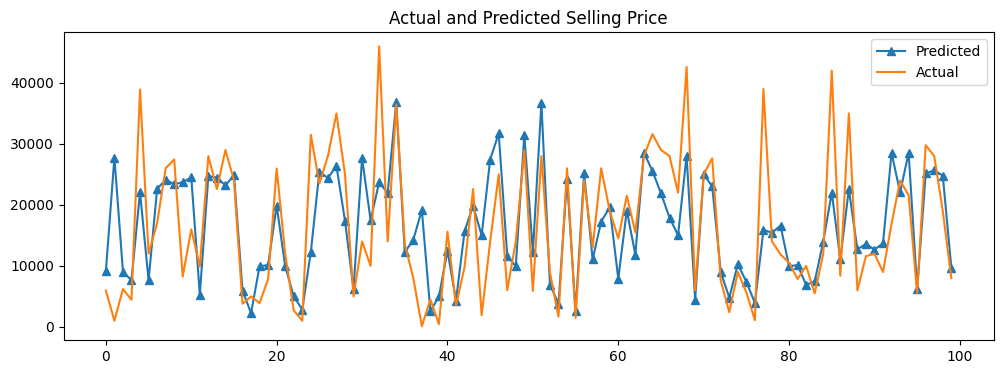

In [64]:
# Evaluate LinearRegression model
start_time = time.time()
linear_score = evaluate_models(best_model_lr, 'LinearRegression', y_test, X_test, y_train, X_train)
score['Linear Regressor'] = linear_score
end_time = time.time()
print("🕒 Duration (seconds):", end_time - start_time)

**4.2 Evaluate Ridge model**

MSE Train: 78525618.38
MSE Test: 78815475.78
RMSE Train: 8861.47
RMSE Test: 8877.81
MAE Train: 6498.04
MAE Test: 6520.54
R2 Train: 0.49
R2 Test: 0.49
Adjusted R2 Train: 0.49
Adjusted R2 Test: 0.49


| Features                   |   Permutation Importance Mean |   Permutation Importance Std |
|----------------------------|-------------------------------|------------------------------|
| log_vehicle_age            |                          0.97 |                         0.01 |
| vehicle_age                |                          0.3  |                         0    |
| odometer                   |                          0.16 |                         0    |
| region_encoded             |                          0.03 |                         0    |
| num_cylinders              |                          0.02 |                         0    |
| vehicle_drive              |                          0.02 |                         0    |
| manufacturer_encoded       |                   

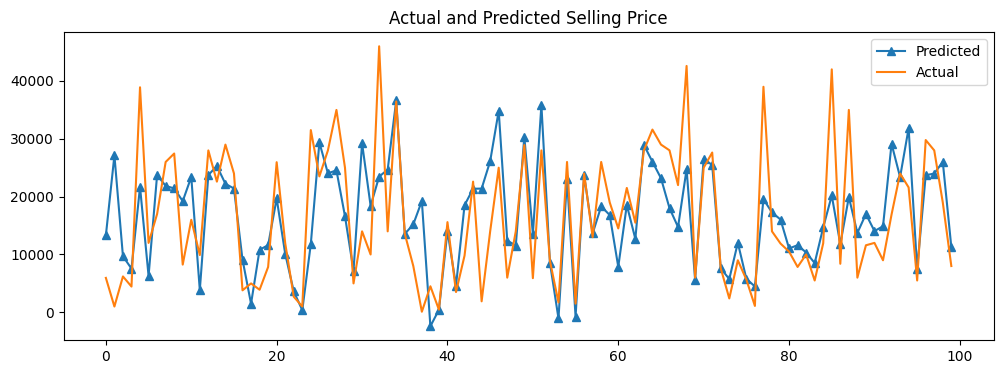

In [65]:
# Evaluate Ridge model
start_time = time.time()
ridge_score = evaluate_models(best_model_rr, 'Ridge', y_test, X_test, y_train, X_train)
score['Ridge Regressor'] = ridge_score
end_time = time.time()
print("🕒 Duration (seconds):", end_time - start_time)

**4.3 Evaluate Lasso model**

MSE Train: 78525577.37
MSE Test: 78815229.33
RMSE Train: 8861.47
RMSE Test: 8877.79
MAE Train: 6497.93
MAE Test: 6520.43
R2 Train: 0.49
R2 Test: 0.49
Adjusted R2 Train: 0.49
Adjusted R2 Test: 0.49


| Features                   |   Permutation Importance Mean |   Permutation Importance Std |
|----------------------------|-------------------------------|------------------------------|
| log_vehicle_age            |                          0.97 |                            0 |
| vehicle_age                |                          0.3  |                            0 |
| odometer                   |                          0.16 |                            0 |
| num_cylinders              |                          0.1  |                            0 |
| region_encoded             |                          0.03 |                            0 |
| vehicle_drive              |                          0.02 |                            0 |
| vehicle_condition          |                   

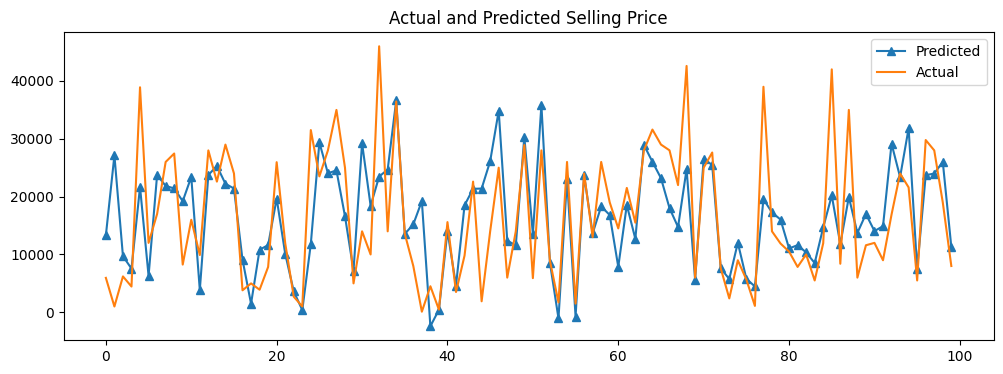

In [66]:
# Evaluate Lasso model
start_time = time.time()
lasso_score = evaluate_models(best_model_ls, 'Lasso', y_test, X_test, y_train, X_train)
score['Lasso Regressor'] = lasso_score
end_time = time.time()
print("🕒 Duration (seconds):", end_time - start_time)

**4.4 Evaluate ElasticNet model**

MSE Train: 78525592.12
MSE Test: 78814732.17
RMSE Train: 8861.47
RMSE Test: 8877.77
MAE Train: 6498.18
MAE Test: 6520.66
R2 Train: 0.49
R2 Test: 0.49
Adjusted R2 Train: 0.49
Adjusted R2 Test: 0.49


| Features                   |   Permutation Importance Mean |   Permutation Importance Std |
|----------------------------|-------------------------------|------------------------------|
| log_vehicle_age            |                          0.96 |                         0.01 |
| vehicle_age                |                          0.3  |                         0    |
| odometer                   |                          0.16 |                         0    |
| num_cylinders              |                          0.03 |                         0    |
| region_encoded             |                          0.03 |                         0    |
| vehicle_drive              |                          0.02 |                         0    |
| manufacturer_encoded       |                   

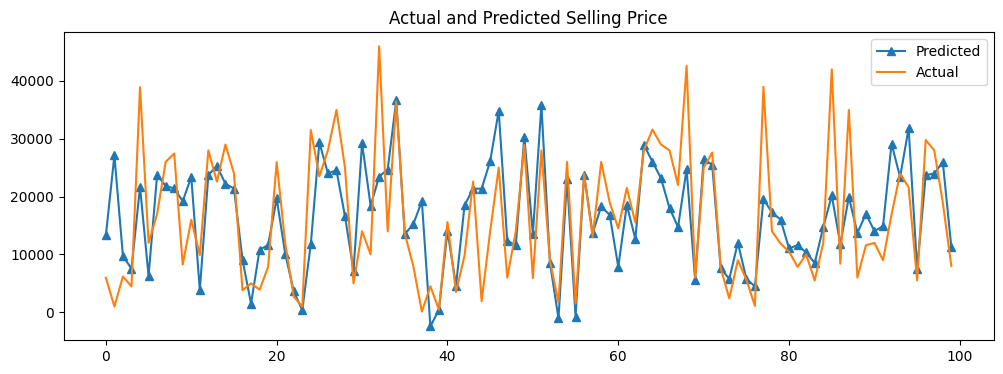

In [68]:
# Evaluate ElasticNet model
start_time = time.time()
elasticnet_score = evaluate_models(best_model_er, 'ElasticNet', y_test, X_test, y_train, X_train)
score['ElasticNet Regressor'] = elasticnet_score
end_time = time.time()
print("🕒 Duration (seconds):", end_time - start_time)

**4.5 Evaluate DecisionTreeRegressor model**

MSE Train: 17943903.42
MSE Test: 37458591.83
RMSE Train: 4236.02
RMSE Test: 6120.34
MAE Train: 2369.16
MAE Test: 3426.05
R2 Train: 0.88
R2 Test: 0.76
Adjusted R2 Train: 0.88
Adjusted R2 Test: 0.76


| Features                   |   Permutation Importance Mean |   Permutation Importance Std |
|----------------------------|-------------------------------|------------------------------|
| log_vehicle_age            |                          0.44 |                            0 |
| odometer                   |                          0.37 |                            0 |
| model_encoded              |                          0.3  |                            0 |
| vehicle_type               |                          0.27 |                            0 |
| num_cylinders              |                          0.23 |                            0 |
| vehicle_drive              |                          0.23 |                            0 |
| vehicle_age                |                   

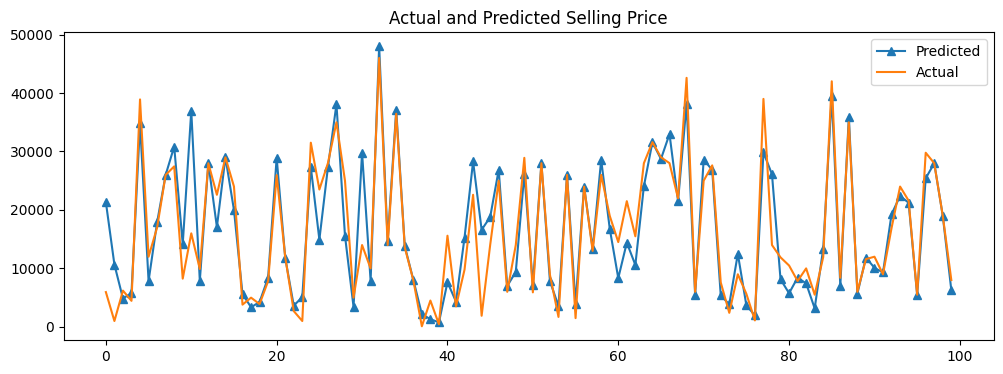

In [69]:
# Evaluate DecisionTreeRegressor model
start_time = time.time()
dt_score = evaluate_models(best_model_dt, 'DecisionTreeRegressor', y_test, X_test, y_train, X_train)
score['DecisionTreeRegressor'] = dt_score
end_time = time.time()
print("🕒 Duration (seconds):", end_time - start_time)

**4.6 Evaluate RandomForestRegressor model**

MSE Train: 23714103.81
MSE Test: 32315012.46
RMSE Train: 4869.71
RMSE Test: 5684.63
MAE Train: 2972.93
MAE Test: 3489.62
R2 Train: 0.85
R2 Test: 0.79
Adjusted R2 Train: 0.85
Adjusted R2 Test: 0.79


| Features                   |   Permutation Importance Mean |   Permutation Importance Std |
|----------------------------|-------------------------------|------------------------------|
| vehicle_age                |                          0.15 |                            0 |
| odometer                   |                          0.14 |                            0 |
| log_vehicle_age            |                          0.14 |                            0 |
| vehicle_type               |                          0.13 |                            0 |
| vehicle_drive              |                          0.11 |                            0 |
| model_encoded              |                          0.09 |                            0 |
| num_cylinders              |                   

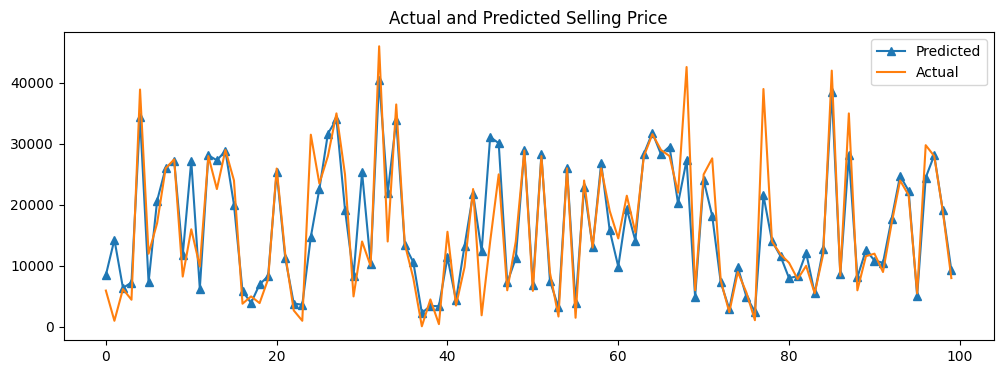

In [70]:
# Evaluate RandomForestRegressor model
start_time = time.time()
rf_score = None
try:
    rf_score = evaluate_models(best_model_rf, 'RandomForestRegressor', y_test, X_test, y_train, X_train)
    score['RandomForestRegressor'] = rf_score
except Exception as e:
    print(f'Exception: {str(e)}')

end_time = time.time()
print("🕒 Duration (seconds):", end_time - start_time)

In [71]:
score

,Linear Regressor,Ridge Regressor,Lasso Regressor,ElasticNet Regressor,DecisionTreeRegressor,RandomForestRegressor
MSE Train,73736824.67,78525618.38,78525577.37,78525592.12,17943903.42,23714103.81
MSE Test,74094678.80,78815475.78,78815229.33,78814732.17,37458591.83,32315012.46
RMSE Train,8587.01,8861.47,8861.47,8861.47,4236.02,4869.71
RMSE Test,8607.83,8877.81,8877.79,8877.77,6120.34,5684.63
MAE Train,6178.74,6498.04,6497.93,6498.18,2369.16,2972.93
MAE Test,6203.41,6520.54,6520.43,6520.66,3426.05,3489.62
R2 Train,0.52,0.49,0.49,0.49,0.88,0.85
R2 Test,0.52,0.49,0.49,0.49,0.76,0.79
Adjusted R2 Train,0.52,0.49,0.49,0.49,0.88,0.85
Adjusted R2 Test,0.52,0.49,0.49,0.49,0.76,0.79


Best Model for MSE Test: RandomForestRegressor with score: 32315012.46
Best Model for R2 Test: RandomForestRegressor with score: 0.79
Best Model for MAE Test: DecisionTreeRegressor with score: 3426.05




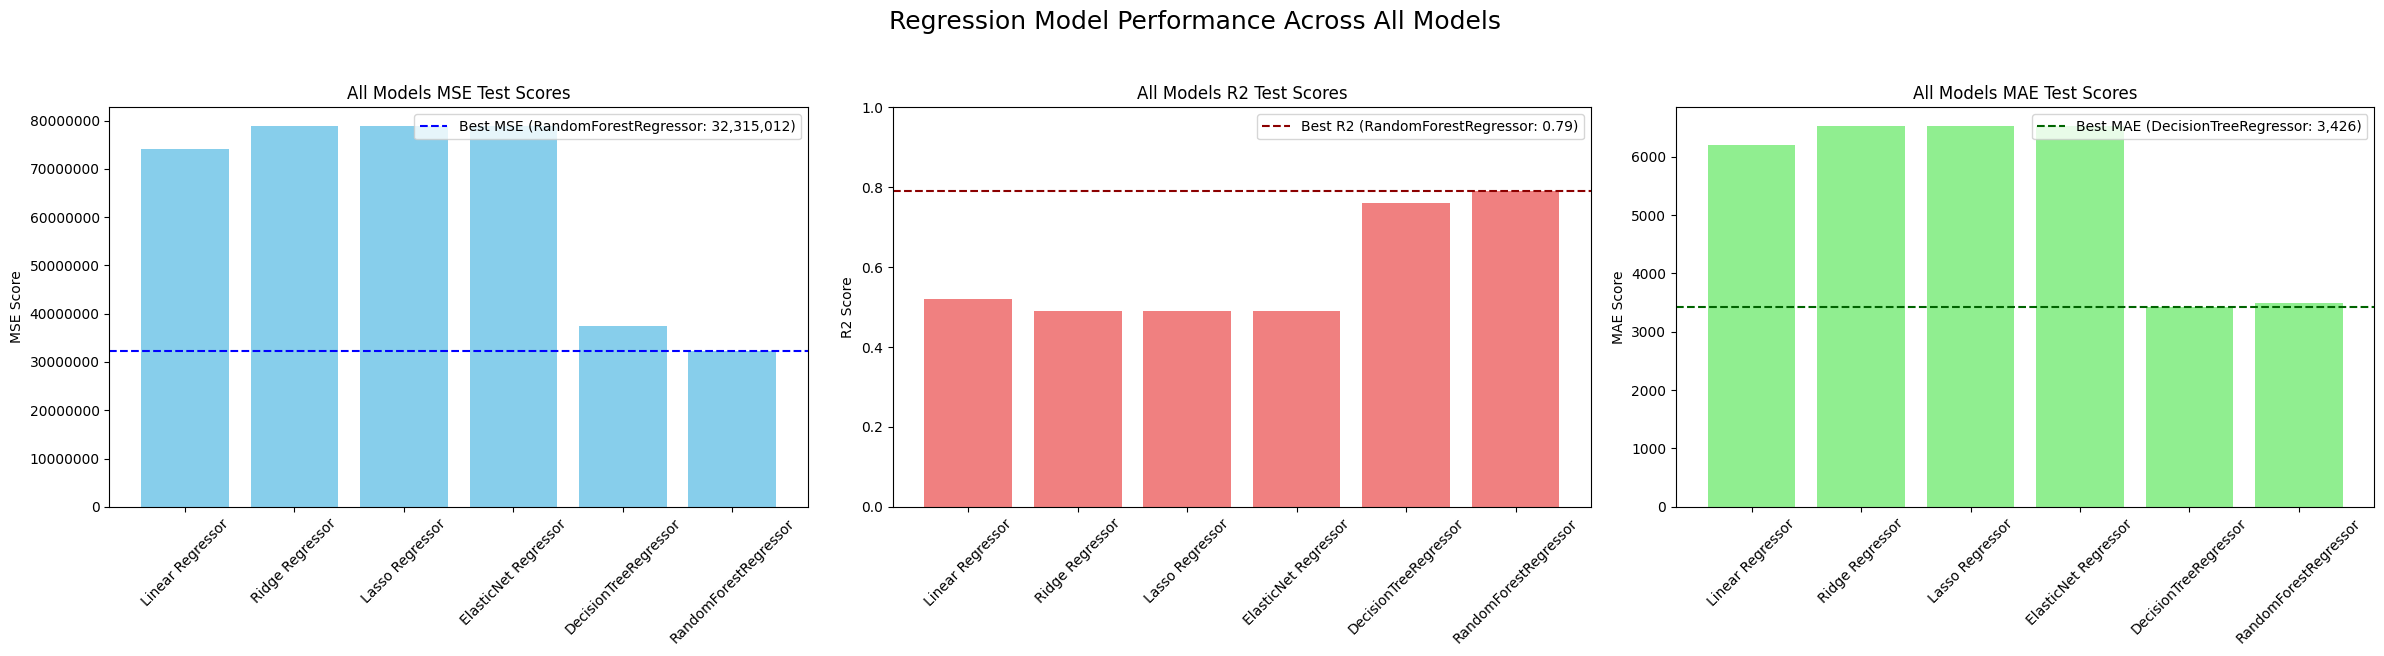

<Figure size 640x480 with 0 Axes>

In [72]:
# Finding the Best regression model based on MSE, R2 & MAE 

mse_test_scores = score.loc['MSE Test']
# Find the model with the minimum MSE Test score
best_mse_model = mse_test_scores.idxmin()
best_mse_score = mse_test_scores.min()

print(f"Best Model for MSE Test: {best_mse_model} with score: {best_mse_score}")

# Best R2 Test Model 
r2_test_scores = score.loc['R2 Test']
# Find the model with the maximum R2 Test score
best_r2_model = r2_test_scores.idxmax()
best_r2_score = r2_test_scores.max()

print(f"Best Model for R2 Test: {best_r2_model} with score: {best_r2_score}")

# --- Best MAE Test Model ---
mae_test_scores = score.loc['MAE Test']
# Find the model with the minimum MAE Test score (MAE is also a lower-is-better metric)
best_mae_model = mae_test_scores.idxmin()
best_mae_score = mae_test_scores.min()

print(f"Best Model for MAE Test: {best_mae_model} with score: {best_mae_score}")
print("\n" + "="*50 + "\n")

# Plotting All Models 
fig, axes = plt.subplots(1, 3, figsize=(24, 7)) 
fig.suptitle('Regression Model Performance Across All Models', fontsize=18)

# Bar chart for All MSE Test Model Scores
models = score.columns
mse_scores = score.loc['MSE Test', models]
axes[0].bar(models, mse_scores, color='skyblue')
axes[0].set_title('All Models MSE Test Scores')
axes[0].set_ylabel('MSE Score')
axes[0].ticklabel_format(style='plain', axis='y') # Prevent scientific notation on y-axis
axes[0].set_ylim(bottom=0) # Ensure y-axis starts at 0 for MSE
axes[0].tick_params(axis='x', rotation=45) # Removed 'ha' argument
axes[0].axhline(y=best_mse_score, color='blue', linestyle='--', label=f'Best MSE ({best_mse_model}: {best_mse_score:,.0f})')
axes[0].legend()


# Bar chart for All R2 Test Model Scores
r2_scores = score.loc['R2 Test', models]
axes[1].bar(models, r2_scores, color='lightcoral')
axes[1].set_title('All Models R2 Test Scores')
axes[1].set_ylabel('R2 Score')
axes[1].set_ylim(0, 1) # R2 score typically ranges from 0 to 1
axes[1].tick_params(axis='x', rotation=45) # Removed 'ha' argument
axes[1].axhline(y=best_r2_score, color='darkred', linestyle='--', label=f'Best R2 ({best_r2_model}: {best_r2_score:.2f})')
axes[1].legend()

# Bar chart for All MAE Test Model Scores
mae_scores = score.loc['MAE Test', models]
axes[2].bar(models, mae_scores, color='lightgreen') # Color for MAE
axes[2].set_title('All Models MAE Test Scores')
axes[2].set_ylabel('MAE Score')
axes[2].ticklabel_format(style='plain', axis='y') # Prevent scientific notation on y-axis
axes[2].set_ylim(bottom=0) # Ensure y-axis starts at 0 for MAE
axes[2].tick_params(axis='x', rotation=45) # Removed 'ha' argument
axes[2].axhline(y=best_mae_score, color='darkgreen', linestyle='--', label=f'Best MAE ({best_mae_model}: {best_mae_score:,.0f})')
axes[2].legend()

plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Adjust layout to prevent title overlap and accommodate rotated labels
plt.show()
plt.savefig('images/best regression models.png')

**Model Performance Summary**
We evaluated a variety of regression models using Mean Squared Error (MSE), Mean Absolute Error (MAE) and R² Test scores to identify the best-performing configurations.

Highlighted Results
* The best overall MSE was achieved by RandomForestRegressor, with an MSE of approximately 32.2 million.
* The highest R² Test score was also obtained by RandomForestRegressor, with a score of 0.79.
* The best overall MAE score was achieved by DecisionTreeRegressor, with a score of 3374
